In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

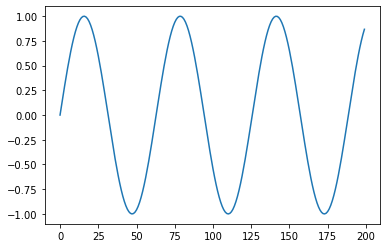

In [7]:
series = np.sin(0.1 * np.arange(200))
plt.plot(series)
plt.show()

In [28]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [67]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile( loss='mse', optimizer=Adam(lr=0.1))

r = model.fit(
    X[:-N // 2] , Y[:-N // 2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 0s 36ms/step - loss: 0.4392 - val_loss: 0.3808
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.2277 - val_loss: 0.1300
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1782 - val_loss: 0.0636
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0367 - val_loss: 0.0614
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0680 - val_loss: 0.0302
Epoch 6/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0243 - val_loss: 0.0705
Epoch 7/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0579 - val_loss: 0.0555
Epoch 8/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0280 - val_loss: 0.0310
Epoch 9/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0372 - val_loss: 0.0129
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0104 - val_loss: 0.0141
Epoch 11/80
3/3 [====================

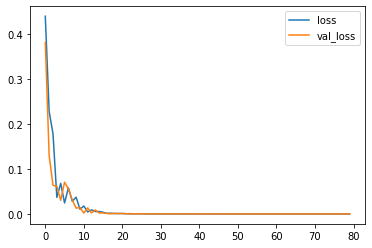

In [68]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [69]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

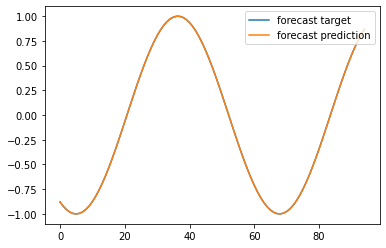

In [70]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()